In [1]:
%matplotlib inline

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('final_data_v3.csv')
df.head(50)

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,0.519951,0.045853,1612.895795,1411.838677,2907.580566,0.107019,-376.876007,111.017372,-31.904015,6.622254,...,-7.439712,-1.034580,-0.203084,-3.513495,-1.745704,-3.011878,-2.878482,-2.106427,-4.026825,1
1,0.535472,0.001771,2892.087076,2467.408141,5072.664388,0.148584,-519.158447,60.781284,-13.722884,52.145428,...,-0.909972,7.216461,-1.719630,3.903021,3.653039,3.043882,2.439958,2.781968,2.195162,1
2,0.496666,0.033657,3429.061935,2788.634413,6886.288452,0.225315,-282.297913,48.581680,-15.522367,12.710723,...,-6.066336,-4.167640,1.017302,-0.523806,0.538693,-8.855953,-2.927977,-1.118562,-5.906227,1
3,0.434888,0.007786,2072.981248,2381.560624,4941.870117,0.086532,-352.871124,106.125084,-5.234628,17.118000,...,-6.883116,-13.236510,-7.681481,-8.179978,1.332158,-12.484453,-6.152116,-16.213850,-6.940216,0
4,0.420671,0.030171,1846.500366,1846.403105,3766.565959,0.109832,-436.923462,57.278519,-3.100974,9.521534,...,-6.689752,-3.594998,-6.064612,0.219622,-4.865091,-6.623953,-4.520340,-5.508701,-5.995493,0
5,0.472825,0.070594,3048.247566,1789.177630,4997.507931,0.323078,-367.393555,27.250257,-84.516068,39.287247,...,-17.158575,6.437908,-12.561196,-4.894081,-4.535070,-9.711329,-7.495490,-3.640197,0.074317,0
6,0.412697,0.059004,1555.648634,1418.599932,2870.737092,0.133998,-340.588013,104.156700,-32.228443,-13.615362,...,-8.247169,0.940006,-5.701087,-6.326630,-1.080040,-1.812609,-2.518986,-3.684266,-3.564146,0
7,0.309277,0.026976,1803.123020,1610.208629,3418.994141,0.121453,-356.820557,101.568939,-28.543821,-0.295161,...,-4.710785,10.763021,0.748671,-5.107100,-3.581699,-5.185194,-4.730515,-13.080507,-6.199188,0
8,0.369728,0.090256,2073.045599,1921.397976,4125.103760,0.121889,-303.722107,66.267288,-13.155840,15.722399,...,-15.458067,1.798759,-11.551136,-5.529944,-7.417243,-15.625635,-8.805659,-4.092432,-11.243354,0
9,0.334862,0.025825,2378.157877,1837.929976,4174.002075,0.195543,-461.928467,64.603355,0.100225,10.270960,...,-14.069416,-5.957351,-7.455938,-1.690422,-8.017926,-4.834618,0.496750,-2.270895,-2.657448,0


In [3]:
from IPython.core.display import HTML # permet d'afficher du code html dans jupyter
display(HTML(df.head(50).to_html()))

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,0.519951,0.045853,1612.895795,1411.838677,2907.580566,0.107019,-376.876007,111.017372,-31.904015,6.622254,-0.816813,-4.456445,-0.198702,-3.759593,-5.181573,-0.665209,-0.656475,-7.439712,-1.034580,-0.203084,-3.513495,-1.745704,-3.011878,-2.878482,-2.106427,-4.026825,1
1,0.535472,0.001771,2892.087076,2467.408141,5072.664388,0.148584,-519.158447,60.781284,-13.722884,52.145428,0.051050,-2.534910,16.103621,-1.494580,4.123252,11.030884,-0.156307,-0.909972,7.216461,-1.719630,3.903021,3.653039,3.043882,2.439958,2.781968,2.195162,1
2,0.496666,0.033657,3429.061935,2788.634413,6886.288452,0.225315,-282.297913,48.581680,-15.522367,12.710723,4.199980,-7.577727,-19.324192,-12.037646,-16.901484,13.693965,0.829615,-6.066336,-4.167640,1.017302,-0.523806,0.538693,-8.855953,-2.927977,-1.118562,-5.906227,1
3,0.434888,0.007786,2072.981248,2381.560624,4941.870117,0.086532,-352.871124,106.125084,-5.234628,17.118000,-13.158109,17.442297,-21.331602,-10.118554,-7.896808,-12.174445,-7.906350,-6.883116,-13.236510,-7.681481,-8.179978,1.332158,-12.484453,-6.152116,-16.213850,-6.940216,0
4,0.420671,0.030171,1846.500366,1846.403105,3766.565959,0.109832,-436.923462,57.278519,-3.100974,9.521534,-7.685150,0.912915,-10.636098,-7.915724,-12.533147,-2.952211,2.407271,-6.689752,-3.594998,-6.064612,0.219622,-4.865091,-6.623953,-4.520340,-5.508701,-5.995493,0
5,0.472825,0.070594,3048.247566,1789.177630,4997.507931,0.323078,-367.393555,27.250257,-84.516068,39.287247,-19.609722,18.510532,-3.435470,7.919528,-10.130322,-7.816190,2.063078,-17.158575,6.437908,-12.561196,-4.894081,-4.535070,-9.711329,-7.495490,-3.640197,0.074317,0
6,0.412697,0.059004,1555.648634,1418.599932,2870.737092,0.133998,-340.588013,104.156700,-32.228443,-13.615362,-3.029665,0.512090,-21.811838,-17.781813,-9.270074,-5.505614,-5.385944,-8.247169,0.940006,-5.701087,-6.326630,-1.080040,-1.812609,-2.518986,-3.684266,-3.564146,0
7,0.309277,0.026976,1803.123020,1610.208629,3418.994141,0.121453,-356.820557,101.568939,-28.543821,-0.295161,-14.515765,6.351990,-12.797723,-4.686419,-7.408648,-10.772921,-3.327215,-4.710785,10.763021,0.748671,-5.107100,-3.581699,-5.185194,-4.730515,-13.080507,-6.199188,0
8,0.369728,0.090256,2073.045599,1921.397976,4125.103760,0.121889,-303.722107,66.267288,-13.155840,15.722399,-23.560472,18.570467,-14.982377,-8.279063,-20.257984,-19.113884,-24.961060,-15.458067,1.798759,-11.551136,-5.529944,-7.417243,-15.625635,-8.805659,-4.092432,-11.243354,0
9,0.334862,0.025825,2378.157877,1837.929976,4174.002075,0.195543,-461.928467,64.603355,0.100225,10.270960,-8.108022,7.461581,-25.433689,-9.207994,-11.280663,-8.241455,1.316127,-14.069416,-5.957351,-7.455938,-1.690422,-8.017926,-4.834618,0.496750,-2.270895,-2.657448,0


In [4]:
df.shape

(164, 27)

In [5]:
df.describe()

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
count,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,...,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000
mean,0.427355,0.057410,2523.686814,2220.906257,4960.994227,0.152761,-308.195274,79.235615,-22.004370,11.371102,...,-2.923098,-3.497779,-1.871596,-4.244728,-1.994836,-3.771506,-1.903882,-2.862051,-1.551924,0.896341
std,0.095260,0.051405,805.841946,571.525248,1535.305313,0.072593,118.053145,35.476137,27.164169,18.376784,...,6.890589,6.318129,6.362116,5.199256,4.985175,5.439184,4.702783,5.063958,4.633063,0.305751
min,0.155702,0.000234,777.646902,899.795307,1335.856120,0.019895,-667.790588,3.534905,-93.683403,-26.702768,...,-19.289259,-21.109362,-25.082899,-26.131557,-14.758977,-17.849297,-15.347728,-16.213850,-11.243354,0.000000
25%,0.363298,0.020420,1946.919546,1849.674340,3992.290751,0.105910,-387.770393,54.365137,-38.694735,0.721765,...,-7.563975,-7.978570,-5.978420,-6.919939,-5.023232,-7.211469,-4.610714,-5.905879,-4.589148,1.000000
50%,0.418052,0.039859,2466.699403,2327.069077,4946.730041,0.135661,-304.564255,74.053673,-17.891332,10.383250,...,-2.715474,-3.347680,-2.041346,-4.385427,-1.547461,-4.161565,-2.313430,-2.967573,-1.718901,1.000000
75%,0.489018,0.075866,2998.969867,2668.143902,5989.046732,0.180843,-211.078491,98.647558,-4.468804,18.174118,...,1.879222,1.016321,1.654910,-0.905409,1.220237,-0.737672,0.711981,0.003370,0.779912,1.000000
max,0.704281,0.241855,5268.005149,3322.024386,8701.806641,0.437887,-35.127018,175.075272,34.715023,119.028061,...,19.217077,10.763021,14.669072,6.526908,12.657738,18.419819,13.108783,16.907413,24.199194,1.000000


In [6]:
Covid = df.label==0
notcovid = df.label==1

In [7]:
data_train = df.sample(frac=0.8, random_state=1)          # 80% des données avec frac=0.8
data_test = df.drop(data_train.index)     # le reste des données pour le test

In [8]:
X_train = data_train.drop(['label'], axis=1)
y_train = data_train['label']
X_test = data_test.drop(['label'], axis=1)
y_test = data_test['label']

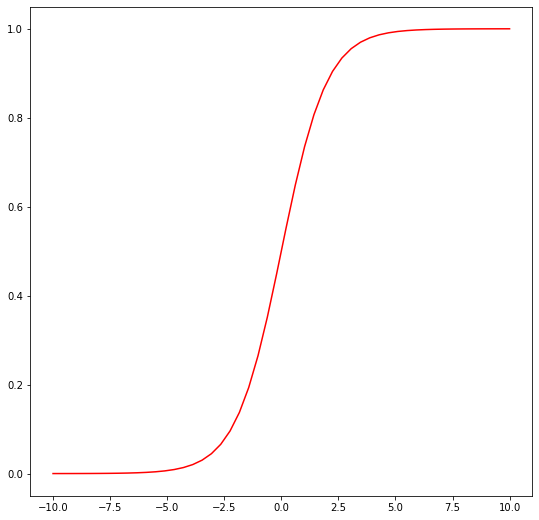

In [9]:
plt.figure(figsize=(9,9))

logistique = lambda x: np.exp(x)/(1+np.exp(x))   

x_range = np.linspace(-10,10,50)       
y_values = logistique(x_range)

plt.plot(x_range, y_values, color="red")

In [10]:
from sklearn.linear_model import LogisticRegression


In [11]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

/Users/japhetditsougaperera/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [12]:
y_lr = lr.predict(X_test)

In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [14]:
lr_score = accuracy_score(y_test, y_lr)
print(lr_score)

0.9090909090909091


In [15]:
# Matrice de confusion
cm = confusion_matrix(y_test, y_lr)
print(cm)

[[ 1  1]
 [ 2 29]]


In [16]:
#On peut aussi utiliser la méthode crosstab de Pandas (plutôt que la méthode confusion_matrix de sklearn) pour afficher la matrice de confusion :
pd.crosstab(y_test, y_lr, rownames=['Reel'], colnames=['Prediction'], margins=True)

Prediction,0,1,All
Reel,,,
0,1,1,2
1,2,29,31
All,3,30,33


In [20]:
def label(lr, chroma_stft=0.277898, rmse=0.097005, spectral_centroid=2546.365388, spectral_bandwidth=2722.760741, rolloff=5742.985026, zero_crossing_rate=0.041142, mfcc1=-162.744537, mfcc2=67.270615, mfcc3=-8.856553, mfcc4=25.807146, mfcc5=23.657213, mfcc6=3.856942, mfcc7=-7.375175, mfcc8=24.732801, mfcc9=-1.500420, mfcc10=-8.230867, mfcc11=-2.412677, mfcc12=-6.254649, mfcc13=-5.486294, mfcc14=5.000111, mfcc15=-16.662300, mfcc16=-11.494907, mfcc17=-3.343724, mfcc18=-3.457817, mfcc19=-7.746650, mfcc20=-10.110889):
    X_test = np.array([ chroma_stft, rmse, spectral_centroid, spectral_bandwidth, rolloff, zero_crossing_rate, mfcc1, mfcc2, mfcc3, mfcc4, mfcc5, mfcc6, mfcc7, mfcc8, mfcc9, mfcc10, mfcc11, mfcc12, mfcc13, mfcc14, mfcc15, mfcc16, mfcc17, mfcc18, mfcc19, mfcc20]).reshape(1, 26)
    print(lr.predict(X_test))

In [21]:
label(lr)
# 1 correspond à un patient non covid et 0 à un patient atteint de la covid

[1]


In [32]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier()
rf.fit(X_train, y_train)
y_rf = rf.predict(X_test)

In [33]:
rf_score = accuracy_score(y_test, y_rf)
print(rf_score)

0.9696969696969697


In [34]:
importances = rf.feature_importances_
indices = np.argsort(importances)

Text(0.5, 1.0, 'Importance des caracteristiques')

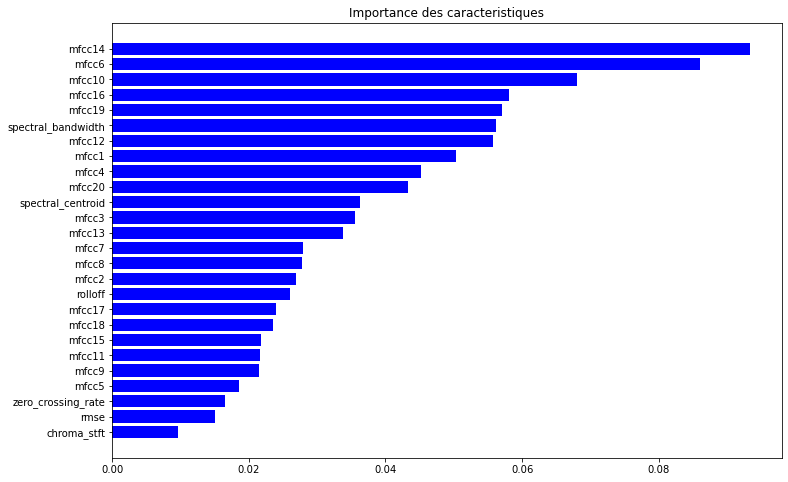

In [35]:
plt.figure(figsize=(12,8))
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), df.columns[indices])
plt.title('Importance des caracteristiques')